<h1>Análise para identificação de perfis de clientes de uma rede de e-commerce</h1>
<p><b>Instituição:</b> USP ESALQ</p>
<p><b>Ano</b>: 2023</p>
<p><b>Autor:</b> João Paulo Ribeiro dos Santos</p>
<p><b>Localização Projeto: </b> <a href = 'https://github.com/Joao-TheCosmosIsInfinite/Cluster-Analysis' target = "_blank">Git Hub</a></p>

[1. Bibliotecas/ Libs](#1)<br>
[2. Carregar Dados](#2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Analise Pre-liminar](#21)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Relacionamento das Bases](#22)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Dicionário dos Dados](#23)<br>
[3. Informação dos dataframes](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Dimensão](#31)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Dados Generalistas](#31)<br>

%pip install nb-mermaid


%%html
<script src="//cdn.rawgit.com/bollwyvl/53e64cdafba38461943b/raw/0815758d591dfaf0f4918b388aed1bf11d82160d/mermaid.full.js"></script>
<style>
    .mermaid *{font-family: sans-serif; }
    .mermaid .node, .mermaid .cluster{
      fill: white !important;
      stroke: black !important;
      stroke-width: 1px !important;
    }
    .mermaid div{
      text-align: center;
    }
    .mermaid .label{
      color: black;
    }
</style>
<script>$(function(){
    // mermaid load a touch weirdly: try immediately, but try again later if it's not available
    var initMermaid = function(){
        return (window.mermaid && mermaid.init()) || setTimeout(initMermaid, 50);         
    }
    initMermaid();

    // for live editing, re-render only the text of the current cell
    window.IPython && $(IPython.events).on("rendered.MarkdownCell", function(evt, data){
        // this is using a hacked mermaid that accepts some nodes!
        mermaid.init(undefined, data.cell.element.find(".mermaid"));
    });
});</script>

<a id ='1'></a>
<h3>1. Bibliotecas/ Libs</h3>

In [1]:
## Bibliotecas para análise inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os


## Utilidades
from matplotlib.gridspec import GridSpec
sys.path.append(os.path.abspath(os.path.join('..')))
from _functions.funcoes_data_viz import *

In [2]:
## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_rows', 200)

## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_columns', 50)

<a id ='2'></a>
<h3>2. Carregar Dados</h3>

In [3]:
## Localização dos dados
path = os.path.abspath(os.path.join('..'))

## Objetos/ DataFrames

# Cliente
df_customers = pd.read_csv(path + '/output/olist_customers_dataset.csv')
# Itens de Pedido
df_order_items = pd.read_csv(path + '/output/olist_order_items_dataset.csv')
# Pagamentos de Pedido
df_order_payments = pd.read_csv(path + '/output/olist_order_payments_dataset.csv')
# Pedido
df_orders = pd.read_csv(path + '/output/olist_orders_dataset.csv')
# Produtos
df_products = pd.read_csv(path + '/output/olist_products_dataset.csv')
# Vendedores
df_sellers = pd.read_csv(path + '/output/olist_sellers_dataset.csv')

<a id ='21'></a>
<h4>2.1. Relacionamento das bases</h4>

Relacionamento das tabelas/ datasets

<img src='../img/table_relation.png' width="1000" height="1000">

<a id ='22'></a>
<h4>2.2. Dicionário dos dados</h4>

<h3>Customer</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>customer_id</td><td>Identificador único do cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_unique_id</td><td>Identificador único de algum documento do cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_zip_code_prefix</td><td>Código postal</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_city</td><td>Cidade onde reside o cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>customer_state</td><td>Estado onde reside o cliente</td><td>Categórica Nominal</td></tr>
</table>


<h3>Order Items</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>order_id</td><td>Identificador único do pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>order_item_id</td><td>Identificador númerico referente ao item no pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>product_id</td><td>Identificador único do produto</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_id</td><td>Identificador único do vendedor</td><td>Categórica Nominal</td></tr>
    <tr><td>shipping_limit_date</td><td>Data limite de entrega</td><td>Numérica Contínua</td></tr>
    <tr><td>price</td><td>Preço do item no pedido</td><td>Numérica Contínua</td></tr>
    <tr><td>freight_value</td><td>Valor do frete cobrado</td><td>Numérica Contínua</td></tr>
</table>


<h3>Order Payments</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>order_id</td><td>Identificador único do pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>payment_sequential</td><td>Identificador sequencial único do pagamento</td><td>Categórica Nominal</td></tr>
    <tr><td>payment_type</td><td>Tipo de pagamento</td><td>Categórica Nominal</td></tr>
    <tr><td>payment_installments</td><td>Número de parcelas</td><td>Numérica Discreta</td></tr>
    <tr><td>payment_value</td><td>Valor total do pagamento</td><td>Numérica Contínua</td></tr>
</table>


<h3>Orders</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>
    <tr><td>customer_id</td><td>Identificador único do cliente</td><td>Categórica Nominal</td></tr>
    <tr><td>order_status</td><td>Status do pedido</td><td>Categórica Nominal</td></tr>
    <tr><td>order_purchase_timestamp</td><td>Data de quando o pedido foi feito</td><td>Numérica Contínua</td></tr>
    <tr><td>order_approved_at</td><td>Data de quando o pedido foi aprovado</td><td>Numérica Contínua</td></tr>
    <tr><td>order_delivered_carrier_date</td><td>Data de quando foi entregue a transportadora</td><td>Numérica Contínua</td></tr>
    <tr><td>order_delivered_customer_date</td><td>Data de quando foi entregue ao cliente</td><td>Numérica Contínua</td></tr>
    <tr><td>order_estimated_delivery_date</td><td>Data estimada para entrega</td><td>Numérica Contínua</td></tr>
</table>


<h3>Products</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>    
    <tr><td>product_id</td><td>Identificador único do produto</td><td>Categórica Nominal</td></tr>
    <tr><td>product_category_name</td><td>Categoria do produto</td><td>Categórica Nominal</td></tr>
    <tr><td>product_name_lenght</td><td>Número de caracteres referentes ao nome</td><td>Numérica Discreta</td></tr>
    <tr><td>product_description_lenght</td><td>Número de caracteres referentes a descrição</td><td>Numérica Discreta</td></tr>
    <tr><td>product_photos_qty</td><td>Quantidade de fotos</td><td>Numérica Discreta</td></tr>
    <tr><td>product_weight_g</td><td>Peso em gramas</td><td>Numérica Contínua</td></tr>
    <tr><td>product_length_cm</td><td>Comprimento em centímetros</td><td>Numérica Contínua</td></tr>
    <tr><td>product_height_cm</td><td>Altura em centímetros</td><td>Numérica Contínua</td></tr>
    <tr><td>product_width_cm</td><td>Largura em centímetros</td><td>Numérica Contínua</td></tr>
</table>


<h3>Sellers</h3>
<table>
    <tr><th>Campo</th><th>Descrição</th><th>Tipo de Variável</th></tr>    
    <tr><td>seller_id</td><td>Identificador único do vendedor</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_zip_code_prefix</td><td>Código postal do vendedor</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_city</td><td>Cidade onde o vendedor reside</td><td>Categórica Nominal</td></tr>
    <tr><td>seller_state</td><td>Estado onde o vendedor reside</td><td>Categórica Nominal</td></tr>    
</table>

<a id ='23'></a>
<h4>2.3. Analise Preliminar</h4>

In [4]:
## Cliente
df_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
## Item de Pedido
df_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [6]:
## Pagamento de Pedido
df_order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [7]:
## Pedido
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [8]:
## Produtos
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [9]:
## Vendedores
df_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


<a id = '3'></a>
<h3>3. Informação dos dataframes</h3>

<a id ='31'></a>
<h4>3.1. Dimensão</h4>

In [10]:
## Dimensão do dataframe
print('Dimensão do dataframe "df_cutomers":',df_customers.shape)
print('Dimensão do dataframe "df_order_items":', df_order_items.shape)
print('Dimensão do dataframe "df_order_payments":',df_order_payments.shape)
print('Dimensão do dataframe "df_orders":',df_orders.shape)
print('Dimensão do dataframe "df_products":',df_products.shape)
print('Dimensão do dataframe "df_sellers":',df_sellers.shape)

Dimensão do dataframe "df_cutomers": (99441, 5)
Dimensão do dataframe "df_order_items": (112650, 7)
Dimensão do dataframe "df_order_payments": (103886, 5)
Dimensão do dataframe "df_orders": (99441, 8)
Dimensão do dataframe "df_products": (32951, 9)
Dimensão do dataframe "df_sellers": (3095, 4)


<a id ='32'></a>
<h4>3.2. Dados Generalistas</h4>

In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [14]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


<a id = '4'></a>
<h3>4. Verificar valores nulos</h3>

In [17]:
## Quantidade de valores nulos por coluna
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [18]:
## Quantidade de valores nulos por coluna
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
## Quantidade de valores nulos por coluna
df_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
## Quantidade de valores nulos por coluna
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
## Porcentagem de valores nulos por coluna
df_orders.isnull().sum() / len(df_orders) * 100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [22]:
## Quantidade de valores nulos por coluna
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
## Porcentagem de valores nulos por coluna
df_products.isnull().sum() / len(df_orders) * 100

product_id                    0.000000
product_category_name         0.613429
product_name_lenght           0.613429
product_description_lenght    0.613429
product_photos_qty            0.613429
product_weight_g              0.002011
product_length_cm             0.002011
product_height_cm             0.002011
product_width_cm              0.002011
dtype: float64

In [24]:
## Quantidade de valores nulos por coluna
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Foram localizados dados nulos em dois dataframes, isso afeta em demasia tanto as analises exploratórias quanto os próprios modelos de machine learning, todavia, a proporção de dados nulos nos datasets varia 3% a menos de 1%. Tendo em vista que essa quantidade é baixa, os registros que contem esses valores nulos serão removidos da amostra. Essa abordagem foi baseada em um outro estudo utilizando técnicas de clusterização nesse mesmo dataset

<b>Fonte:</b> <br>
CARVALHO, Gabriel Alher. Algoritmos de clusterização e o modelo rfv (recência,
frequência e valor) aplicados em dados de e-commerce. Orientador: Mariana Kleina. 2022. 80 f. TCC (Graduação) – Curso de Engenharia de produção, Setor de tecnologia, Universidade Federal do Paraná, Curitiba, 2020. Disponível em: https://docs.ufpr.br/~marianakleina/TCC17.pdf

In [25]:
## Removendo Valores Nulos
for col in df_orders.columns[df_orders.isna().any()].tolist():
    df_orders = df_orders[pd.notnull(df_orders[col])]
    
## Verificar se ainda existem dados nulos
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [26]:
## Removendo Valores Nulos
for col in df_products.columns[df_products.isna().any()].tolist():
    df_products = df_products[pd.notnull(df_products[col])]

## Verificar se ainda existem dados nulos
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


<a id = '5'></a>
<h3>5. Análise Exploratória</h3>

<a id ='51'></a>
<h4>5.1. Analise Univariada</h4>

<a id = '511'></a>
<h5>5.1.1. Dataset df_customers </h5>

In [27]:
## Primeiros 5 Registros
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### NOTA !!!

As variáveis **customer_id** e **customer_unique_id** são variáveis que identificam um cliente, isto é, são id's. Logo não faz sentido descrevêla em detalhes, o máximo que pode ser feito é avaliar sua quantidade distinta.

In [34]:
print("Quantidade de Linhas: ", len(df_customers))
print("Quantidade Distinta de customer_id: ", df_customers['customer_id'].nunique())
print("Quantidade Distinta de customer_unique_id: ", df_customers['customer_unique_id'].nunique())

Quantidade de Linhas:  99441
Quantidade Distinta de customer_id:  99441
Quantidade Distinta de customer_unique_id:  96096


In [41]:
## Verificando valores duplicados
duplicateRows = df_customers[df_customers.duplicated(['customer_unique_id'])]\
                        .sort_values(by=['customer_unique_id', 'customer_id'])
duplicateRows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
87012,d95f60d70d9ea9a7fe37c53c931940bb,004b45ec5c64187465168251cd1c9c2f,57035,maceio,AL
61403,f530197ea86ced9488a03d055e118ebf,0058f300f57d7b93c477a131a59b36c3,40731,salvador,BA
87414,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,72595,brasilia,DF
...,...,...,...,...,...
88272,09c682ef897935e677a0996cfe2008f3,ff44401d0d8f5b9c54a47374eb48c1b8,13070,campinas,SP
92931,62a2c35611e8757e40fbbcecb3c9b2bd,ff8892f7c26aa0446da53d01b18df463,45972,ibiraja,BA
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP


### NOTA !!!

Foram identificados valores duplicados no campo customer_unique_id, que é um dos campos que compoe o id do cliente. Não é o campo utilizado no join, portanto não afetará a analise em nada, mas é um bom ponto de atenção, dado que um mesmo cliente pode ter mais de um cadastro na plataforma, pode ser desde um bug até uma característica distinta do negócio.

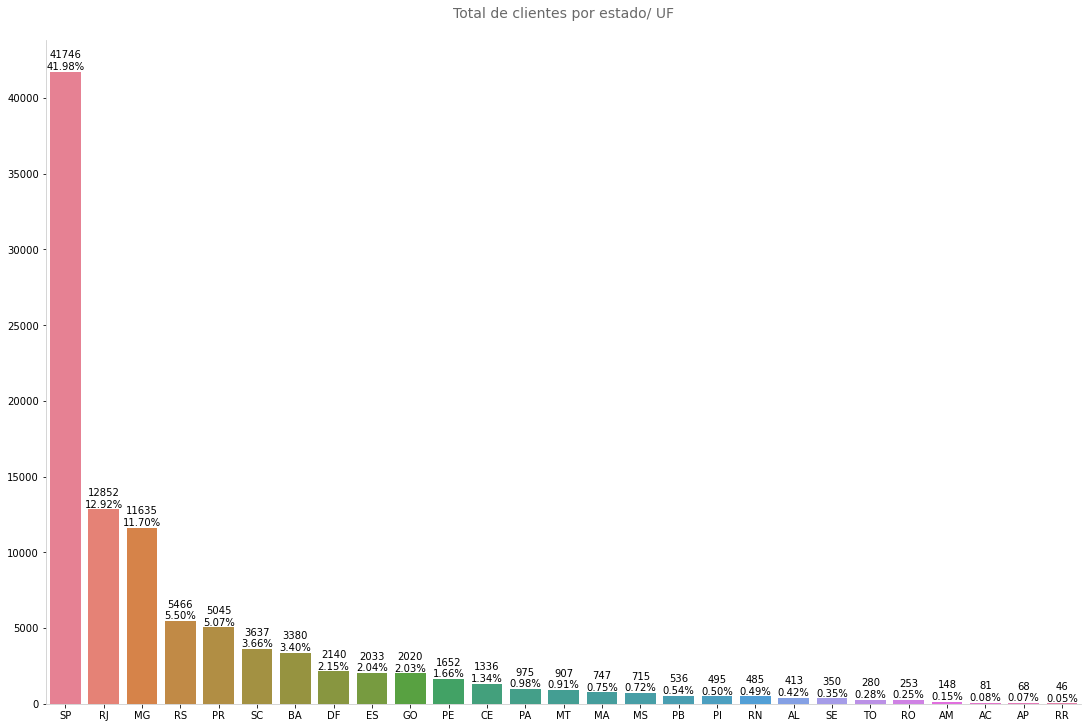

In [28]:
## Total de Clientes por Estado
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

bar_count_plot(df_customers, 
               x='customer_state', 
               order=True,
               ax=ax1,
               title='Total de clientes por estado/ UF')
ax1.set_ylabel('')
ax1.set_xlabel('')
plt.show()

In [30]:
## Total de clientes por cidade
df_customers['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

### NOTA !!!

Cerca de 82% dos clientes são da região Sul e Sudeste e existem os clientes estão bem espalhados entre municipios, embora haja concentração deles nas capitais.

<a id = '512'></a>
<h5>5.1.2. Dataset df_order_items </h5>

In [43]:
## Primeiros 5 Registros
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### NOTA !!!

Essa tabela se refere aos itens de pedido portanto haverão valores duplicados para os dados referentes a **order_id** e **seller_id**, pois um mesmo pedido pode ter mais de um produto, e um mesmo pedido pode ter produtos de um mesmo vendedor.

In [46]:
## Menor data limite de entrega
print ("Menor data limite de entrega: ", df_order_items.shipping_limit_date.min())
## Maior data limite de entrega
print ("Maior data limite de entrega: ", df_order_items.shipping_limit_date.max())

Menor data limite de entrega:  2016-09-19 00:15:34
Maior data limite de entrega:  2020-04-09 22:35:08


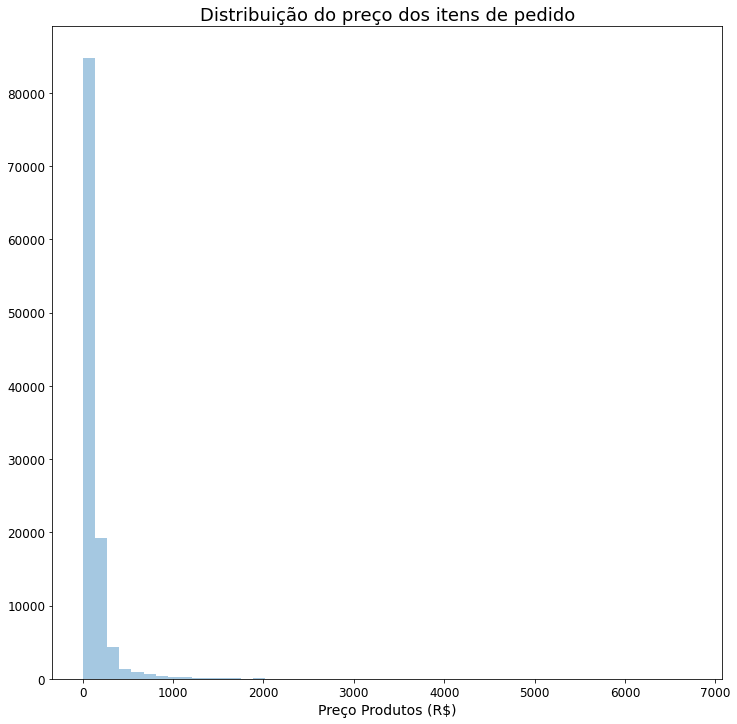

In [49]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_order_items['price'],
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('Preço Produtos (R$)',
           fontsize = 14)

## Titulo
plt.title('Distribuição do preço dos itens de pedido', 
          fontsize = 18)

## Exibir
plt.show()

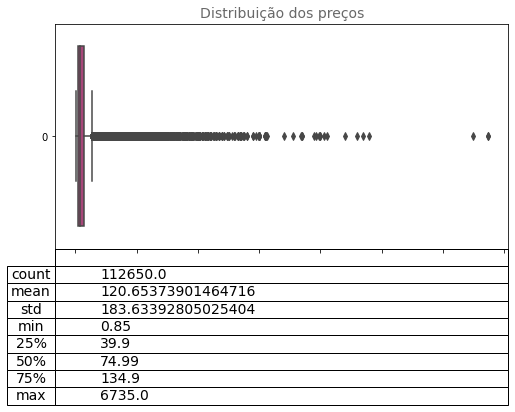

In [54]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_order_items, column='price', ax=ax, title='Distribuição dos preços', palette='magma')

In [53]:
## Criando faixas de preço
pd.cut(df_order_items.price, bins=5, right=True).value_counts()

(-5.884, 1347.68]     112201
(1347.68, 2694.51]       403
(2694.51, 4041.34]        37
(4041.34, 5388.17]         6
(5388.17, 6735.0]          3
Name: price, dtype: int64

In [55]:
## Criando faixas de preço
pd.cut(df_order_items.price, bins=5, right=True).value_counts() / len(df_order_items) * 100

(-5.884, 1347.68]     99.601420
(1347.68, 2694.51]     0.357745
(2694.51, 4041.34]     0.032845
(4041.34, 5388.17]     0.005326
(5388.17, 6735.0]      0.002663
Name: price, dtype: float64

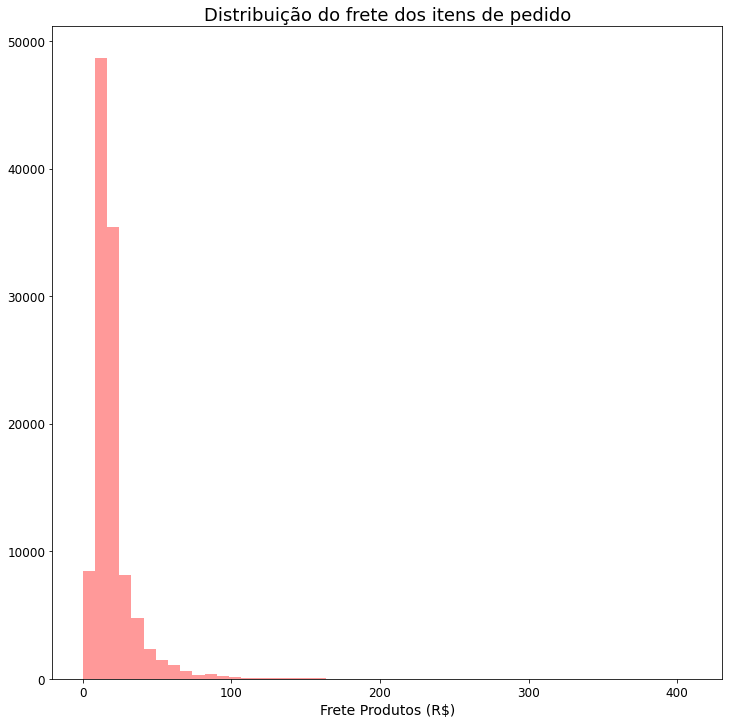

In [57]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_order_items['freight_value'], color = 'red',
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('Frete Produtos (R$)',
           fontsize = 14)

## Titulo
plt.title('Distribuição do frete dos itens de pedido', 
          fontsize = 18)

## Exibir
plt.show()

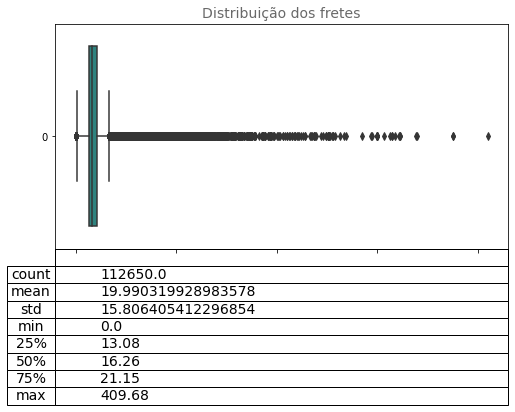

In [59]:
# Chamando a funcao para fazer a plotagem
fig, ax = plt.subplots(figsize=(9, 4))
boxplot(df_order_items, column='freight_value', ax=ax, title='Distribuição dos fretes')

In [60]:
## Criando faixas de preço
pd.cut(df_order_items.freight_value, bins=5, right=True).value_counts()

(-0.41, 81.936]       111384
(81.936, 163.872]       1118
(163.872, 245.808]       111
(245.808, 327.744]        32
(327.744, 409.68]          5
Name: freight_value, dtype: int64

In [61]:
## Criando faixas de preço
pd.cut(df_order_items.freight_value, bins=5, right=True).value_counts() / len(df_order_items) * 100

(-0.41, 81.936]       98.876165
(81.936, 163.872]      0.992455
(163.872, 245.808]     0.098535
(245.808, 327.744]     0.028407
(327.744, 409.68]      0.004439
Name: freight_value, dtype: float64

### NOTA !!!

**99.6%** dos itens de pedido estão na faixa _0 até 1347_, indicando que no geral os itens de pedido são baratos, a esmagadora maioria dos produtos comprados são produtos com baixo valor agregado.

Um cenário similar é eoncotrado no frete onde **98.8%** dos fretes pagos estão na faixa _0 até 81_, isso pode estar relacionado ao valor do produto que é barato ou TALVEZ UM PERFIL DE CLIENTE que adquire produtos com frete baixo, ou de vendedores próximos